###### Understanding the key aspects of statistics and visualization
* Dscriptive statistics is how we can describe or summarize the data
* Inferential statistics is how we can use tests to make claims or inferences about the data that can be used for decision making, forecasting, or predictions
* Data vizualization is how we can apply the graphical representation of data

In [1]:
import pandas as pd

In [11]:
df1 = pd.read_csv('freedom_choice.csv',skiprows=2)
df1.head()

,Month,freedom: (United States),choice: (United States)
0,2004-01,60,56
1,2004-02,64,51
2,2004-03,64,51
3,2004-04,69,58
4,2004-05,66,50


In [10]:
print(df1.columns)

Index(['freedom', 'choice'], dtype='object')


In [13]:
# rename columns
df1.columns = ['date', 'freedom', 'choice']
# set index column
df1.set_index('date', inplace=True)
# shape of data, row x columns
df1.shape

(194, 2)

##### Descriptive Statistics

In [14]:
df1.describe()

,freedom,choice
count,194.000000,194.000000
mean,56.974227,58.448454
std,5.045324,8.510276
min,46.000000,44.000000
25%,53.250000,52.000000
50%,56.500000,57.000000
75%,60.000000,63.000000
max,74.000000,100.000000


In [17]:
print('Max freedom:', df1.freedom.max())
print('Min freedom:', df1.freedom.min())
print('Range freedom:', df1.freedom.max()-df1.freedom.min())
print('Mean freedom:',df1.freedom.mean())
print('Median freedom:',df1.freedom.median())
print('Mode freedom:',df1.freedom.mode())

Max freedom: 74
Min freedom: 46
Range freedom: 28
Mean freedom: 56.97422680412371
Median freedom: 56.5
Mode freedom: 0    56
dtype: int64


In [20]:
import matplotlib as plot

<AxesSubplot:xlabel='date'>

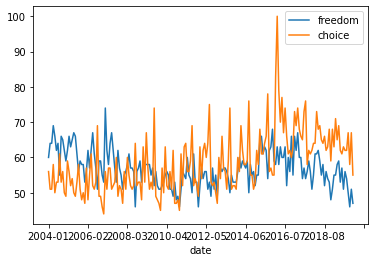

In [23]:
figsize = (20,2)
df1.plot()

<AxesSubplot:xlabel='freedom', ylabel='choice'>

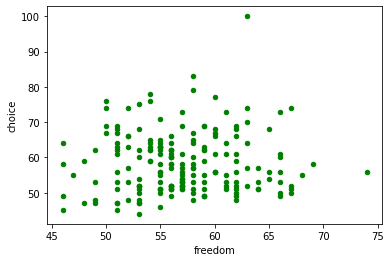

In [24]:
df1.plot('freedom','choice',kind='scatter',color='green')

<AxesSubplot:ylabel='Frequency'>

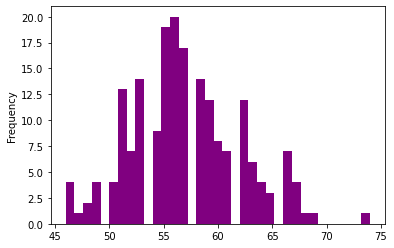

In [25]:
df1.freedom.plot(kind='hist',bins=35,color='purple')

<AxesSubplot:ylabel='Frequency'>

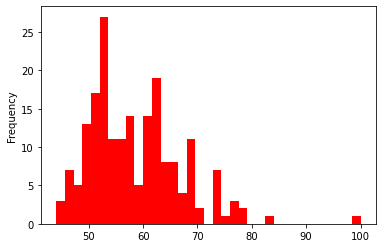

In [26]:
df1.choice.plot(kind='hist',bins=35,color='red')

##### Inferential Statistics

In [27]:
# Checking correlation
results_correlation=df1.freedom.corr(df1.choice)
print('Freedom and Choice correlation:',results_correlation)

Freedom and Choice correlation: 0.03212824774995358


In [29]:
#Looking at the second data set
df2=pd.read_csv('responsibility_choice.csv',skiprows=2)
df2.columns=['date','responsibility','choice']
df2.set_index('date',inplace=True)
df2.head()

,responsibility,choice
date,,
2018-12-30,39,11
2019-01-06,57,29
2019-01-13,67,46
2019-01-20,85,36
2019-01-27,96,33


In [31]:
results_correlation2=df2.responsibility.corr(df2.choice)
print('Responsibility and Choice correlation:',results_correlation2)

Responsibility and Choice correlation: 0.7440330253049601


In [34]:
# Linear Regression as an example of inferential statistics
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

X=df2.choice ## X = input variable
y=df2.responsibility ## Y is our output value
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y,X).fit() #sm.OLS(output,input)
predictions=model.predict(X)
# Print out the stats
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         responsibility   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     62.00
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           2.60e-10
Time:                        02:16:39   Log-Likelihood:                -204.53
No. Observations:                  52   AIC:                             413.1
Df Residuals:                      50   BIC:                             417.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1494      4.964      6.679      0.000      23.180      43.119
choice         1.1282      0.143      7.874      0.000       0.840       1.416
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.035
Skew:                           0.064   Prob(JB):                        0.982
Kurtosis:                       2.988   Cond. No.                         98.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Data Vizualization

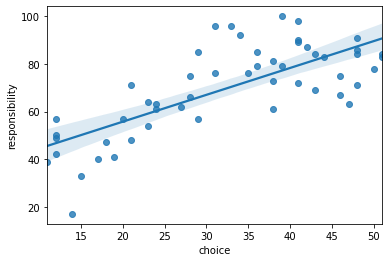

In [37]:
# Regression plot
import seaborn as sns
sns.regplot(y='responsibility',x='choice',data=df2);

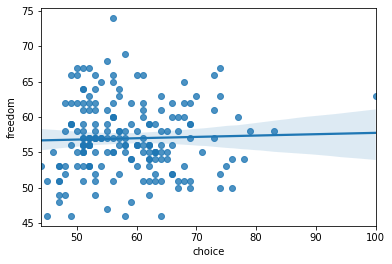

In [39]:
import seaborn as sns
sns.regplot(y='freedom',x='choice',data=df1);

In [40]:
print(predictions)

date
2018-12-30    45.560183
2019-01-06    65.868683
2019-01-13    85.048933
2019-01-20    73.766433
2019-01-27    70.381683
2019-02-03    79.407683
2019-02-10    79.407683
2019-02-17    86.177183
2019-02-24    85.048933
2019-03-03    65.868683
2019-03-10    63.612183
2019-03-17    81.664183
2019-03-24    79.407683
2019-03-31    77.151183
2019-04-07    71.509933
2019-04-14    90.690183
2019-04-21    73.766433
2019-04-28    87.305433
2019-05-05    76.022933
2019-05-12    64.740433
2019-05-19    59.099183
2019-05-26    46.688433
2019-06-02    56.842683
2019-06-09    60.227433
2019-06-16    59.099183
2019-06-23    55.714433
2019-06-30    46.688433
2019-07-07    54.586183
2019-07-14    52.329683
2019-07-21    53.457933
2019-07-28    50.073183
2019-08-04    46.688433
2019-08-11    46.688433
2019-08-18    56.842683
2019-08-25    76.022933
2019-09-01    72.638183
2019-09-08    79.407683
2019-09-15    82.792433
2019-09-22    77.151183
2019-09-29    76.022933
2019-10-06    68.125183
2019-10-13 